## Capstone challenge as part of Summer Analytics 2023

In [1]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# import datasets
train = pd.read_csv('train_transformed.csv')
# train = pd.read_csv('Train_Data.csv')
# test = pd.read_csv('Test_Data.csv')

In [2]:
# !pip install pycaret==2.3.10 markupsafe==2.0.1 pyyaml==5.4.1 -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 19.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.2/25.2 MB 54.2 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [8]:
# !pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 16.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 4.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 55.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 56.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [9]:
from pycaret.classification import *
# import pycaret

In [11]:
exp_clf = setup(train, target = 'pred', session_id = 123)


,Description,Value
0,Session id,123
1,Target,pred
2,Target type,Binary
3,Original data shape,"(22584, 20)"
4,Transformed data shape,"(22584, 20)"
5,Transformed train set shape,"(15808, 20)"
6,Transformed test set shape,"(6776, 20)"
7,Numeric features,19
8,Preprocess,True
9,Imputation type,simple


In [12]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.7845,0.5874,0.0059,0.6154,0.0116,0.0071,0.0398,0.1360
et,Extra Trees Classifier,0.7844,0.5491,0.0018,0.5500,0.0035,0.0024,0.0238,2.6880
lr,Logistic Regression,0.7842,0.5799,0.0026,0.3667,0.0052,0.0029,0.0193,1.0270
dummy,Dummy Classifier,0.7842,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0930
rf,Random Forest Classifier,0.7840,0.5555,0.0026,0.3817,0.0052,0.0026,0.0173,7.8440
ridge,Ridge Classifier,0.7839,0.0000,0.0003,0.0500,0.0006,-0.0003,-0.0034,0.1170
gbc,Gradient Boosting Classifier,0.7837,0.5724,0.0047,0.4100,0.0093,0.0043,0.0239,7.1550
ada,Ada Boost Classifier,0.7830,0.5686,0.0082,0.3485,0.0159,0.0068,0.0239,1.7870
lightgbm,Light Gradient Boosting Machine,0.7819,0.5531,0.0067,0.2999,0.0131,0.0030,0.0125,0.8330
nb,Naive Bayes,0.7797,0.5796,0.0334,0.3819,0.0612,0.0274,0.0554,0.0950


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

In [13]:
dt = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7837,0.6009,0.0088,0.4286,0.0172,0.0086,0.0345
1,0.7856,0.5997,0.0147,0.6250,0.0287,0.0190,0.0710
2,0.7830,0.5896,0.0000,0.0000,0.0000,-0.0025,-0.0187
3,0.7849,0.5816,0.0059,0.6667,0.0116,0.0079,0.0478
4,0.7849,0.5895,0.0029,1.0000,0.0058,0.0046,0.0480
5,0.7849,0.6176,0.0029,1.0000,0.0058,0.0046,0.0480
6,0.7843,0.5636,0.0059,0.5000,0.0116,0.0066,0.0348
7,0.7830,0.5598,0.0029,0.3333,0.0058,0.0020,0.0124
8,0.7848,0.5939,0.0088,0.6000,0.0173,0.0112,0.0526


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [15]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7837,0.6007,0.0088,0.4286,0.0172,0.0086,0.0345
1,0.7856,0.5996,0.0147,0.6250,0.0287,0.0190,0.0710
2,0.7830,0.5899,0.0000,0.0000,0.0000,-0.0025,-0.0187
3,0.7849,0.5817,0.0059,0.6667,0.0116,0.0079,0.0478
4,0.7849,0.5894,0.0029,1.0000,0.0058,0.0046,0.0480
5,0.7849,0.6176,0.0029,1.0000,0.0058,0.0046,0.0480
6,0.7843,0.5634,0.0059,0.5000,0.0116,0.0066,0.0348
7,0.7830,0.5596,0.0029,0.3333,0.0058,0.0020,0.0124
8,0.7848,0.5940,0.0088,0.6000,0.0173,0.0112,0.0526


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [16]:
#trained model object is stored in the variable 'dt'.
print(tuned_dt)

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)


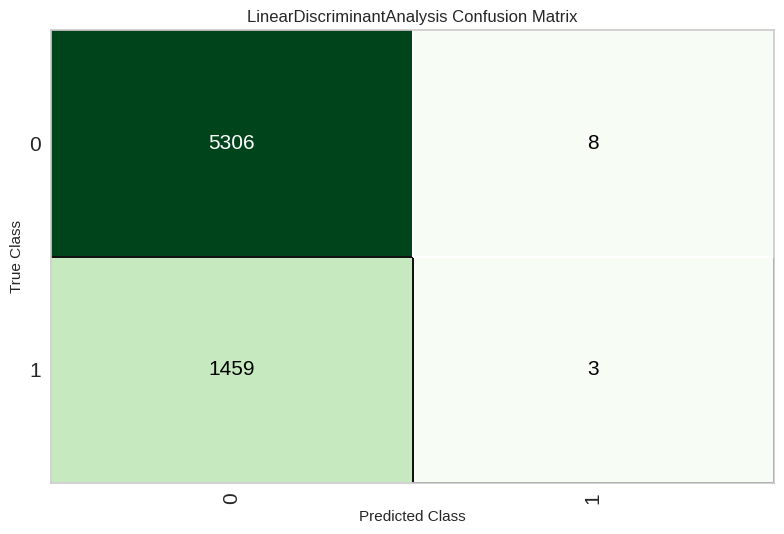

In [17]:
plot_model(tuned_dt, plot = 'confusion_matrix')

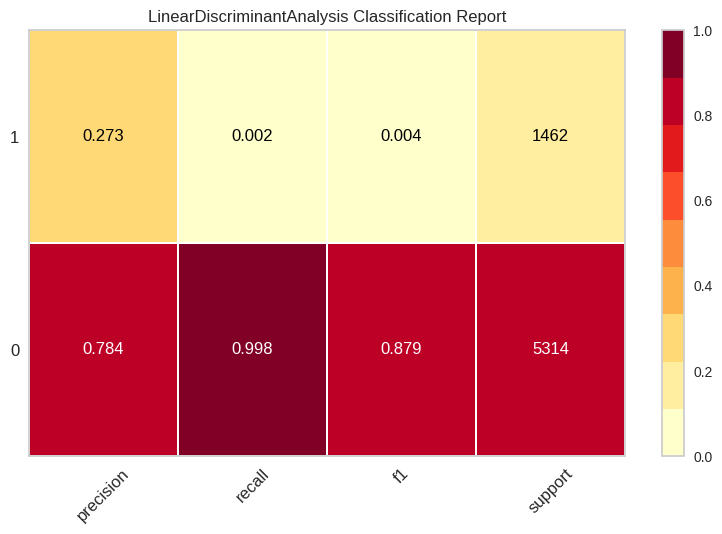

In [18]:
plot_model(tuned_dt, plot = 'class_report')

In [19]:
final_knn = finalize_model(tuned_dt)

In [20]:
print(final_knn)

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Unnamed: 0', 'pc', 'ld', 'm0',
                                             'm1', 'm2', 'm3', 'm4', 'm5', 'm6',
                                             'm7', 'm8', 'm9', 'm10', 'm11',
                                             'm12', 'm13', 'm14', 'ma'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strateg...
                                                              strategy='mos

In [22]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 7.4 MB/s eta 0:00:00


In [25]:
from catboost import CatBoostClassifier
catboost = create_model('catboost')

ValueError: ignored

In [ ]:
tuned_catboost=tune_model(catboost)